In [1]:
# Libraries:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from D_CODE.run_simulation import run as run_SRT
from D_CODE.run_simulation_vi import run as run_DCODE
from toolbox.auxiliary_functions import set_param_freq

from data import equations
from data import SINDy_data

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


## Parte 1

In [2]:
# Select ODE & settings:
ode_name = 'TVLvODE2_d' # help="name of the ode", type=str
ode_param = "1.,-0.1,-1.5,0.075" # help="parameters of the ode (default: None)", type=str, default=None
freq = 20 # Dovrebbe essere 195 per avere dt = 5.130 * 10−3 come nel paper di riferimento
dt = 1 / freq
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
dim_x = 3 # help="dimentionality of the problem", type=int
dim_k = 0 # help="dimentionality of the parameterizaiton discovery", type=int
# ode_param, freq = set_param_freq(ode_param, freq)
# ode = equations.get_ode(ode_name, ode_param)
# time_vector = np.arange(0, ode.T + dt, dt)

In [ ]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name=ode_name, 
                                                                   ode_param=ode_param,
                                                                   freq=freq,
                                                                   n_sample=n_sample,
                                                                   noise_ratio=noise_ratio,
                                                                   dim_x=dim_x,
                                                                   dim_k=dim_k)
# X_list = SINDy_data.existence_conditions(X_list, ode.init_low, n_variables=dim_x)

# save data:
# file_path = 'saved/data/TVLvODE_data.pkl'
# os.makedirs(os.path.dirname(file_path), exist_ok=True)
# with open(file_path, 'wb') as f:
#     dill.dump((X_list, dX_list, param_list, feature_names), f)

Con rumore ci impiega poco piu di 2 min per generare una singola traiettoria.
Si potrebbe parallelizzare, ma comunque la generazione è molto lunga.
In questa fase di testing possiamo mettere o rumore nullo o giocare con una sola traiettoria.
Ricorda di cambiare la std_base    

In [ ]:
SINDy_data.plot_configuration(X_list)
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:2])

In [ ]:
# uploda data:
# file_path = 'saved/data/TVLvODE_data.pkl'
# with open(file_path, 'rb') as f:
#     X_list, dX_list, param_list, feature_names = dill.load(f)

In [ ]:
# X = np.array(X_list)[:,:,:2]
# print('Shape: ',X.shape)

# vec_rmse = []
# for i in range(X.shape[0]):
#     rmse = root_mean_squared_error(X[i], np.zeros(X[i].shape))
#     print('RMSE: ', rmse)
#     vec_rmse.append(rmse)

# vec_rmse = np.array(vec_rmse)
# print('RMSE Mean: ', vec_rmse.mean())

In [3]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq

Start = [49,50,51] 
# Start = [61,62,63,64,65] 
# Start = [50,53,55,56,57,60] 
for T in Start:
    print(' ')
    print('Simulazione tra: ', '[',T, ',',T+10, ']')
    run_DCODE(ode_name, param, 0, freq, n_sample, noise_ratio, seed=100, n_seed=1, T0=T, T=T+10)
    None

Running with: ode_name=TVLvODE2_d, ode_param=1.,-0.1,-1.5,0.075, x_id=0, freq=20, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
 
Simulazione tra:  [ 49 , 59 ]
ODE specified:  TVLvODE2_d
Data generated
Dataset shape before smoothing:  (201, 50, 3)
Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      2.99933e+37       11          40720.7          43641.5      2.75m
   1     8.74      9.01421e+15        5          39141.5          55481.1      2.42m
   2     8.23      2.27795e+15       10          38992.5          35864.5      2.22m
 
promising programs:
mul(sin(sin(neg(mul(neg(5.448), sin(X2))))), X1)
mul(sin(mul(neg(5.448), sin(X2))), add(sin(mul(X2, X2)), add(sub(2.941,

- T = 56: sin(0.5008226879169348*X2) -> NON TROVA patience = 4
- T = 57: sin(5.85685419176154*X2) -> NON TROVA patience = 5
- T = 58: -> D-CODE sin(5.068949033687468*sin(X2)) patience = 6
- T = 59: sin(5.448175735771112*sin(X2)) patience = 7
- T = 60 QUI

- sin(4.997271008241834*X2)
- sin(5.102140407099291*X2)
- sin(5.010848520737575*X2)

- T = 61: sin(5.33594343872588*X2)

In [7]:
# Load data:
file_path = 'Online-Test/saved/data/TVLvODE2_d_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

T0 = 51
T = 61

X_lista = [np.array(x)[T0*20:T*20, :] for x in X_list]
dX_lista = [np.array(dx)[T0*20:T*20, :] for dx in dX_list]

# lambda function:
building_blocks_lambda = lambda X0, X1, X2: np.sin(4.9973*X2)
function_names = lambda X0, X1, X2: "sin( 4.9973*"+ X2 + " )"

# building the library:
from toolbox.auxiliary_functions import intercept_library_fun
intercept_library = intercept_library_fun(dim_x+dim_k)
polynomial_library = ps.PolynomialLibrary(degree=2, include_bias=False)
custom_library = ps.CustomLibrary(library_functions=[building_blocks_lambda], function_names=[function_names]) # custom library with building block
generalized_library = ps.GeneralizedLibrary(libraries=[polynomial_library, custom_library],tensor_array=[[1, 1]])
final_library = ps.ConcatLibrary([intercept_library, generalized_library]) # add the intercept


model = ps.SINDy(feature_names=feature_names, feature_library=final_library, optimizer=ps.STLSQ(threshold=0.07))
model.fit(X_lista, t=dt, multiple_trajectories=True, x_dot=dX_lista)
print("Symbolic-SINDy model: ")
model.print()

Symbolic-SINDy model: 
(X0)' = 0.238 1 + 0.987 X0 + -0.090 X0 X1 + 0.208 sin( 4.9973*X2 ) + 0.363 X0 sin( 4.9973*X2 )
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1


## Parte 2

In [ ]:
# Select ODE & settings:
ode_name = 'TVLvODE3' # help="name of the ode", type=str
ode_param = "1.,-0.1,-1.5, 0.075" # help="parameters of the ode (default: None)", type=str, default=None
freq = 10 # Dovrebbe essere 195 per avere dt = 5.130 * 10−3 come nel paper di riferimento
dt = 1 / freq
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
dim_x = 3 # help="dimentionality of the problem", type=int
dim_k = 0
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)
time_vector = np.arange(0, ode.T + dt, dt)

In [3]:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name=ode_name, 
                                                                   ode_param=ode_param,
                                                                   freq=freq,
                                                                   n_sample=1,
                                                                   noise_ratio=noise_ratio,
                                                                   dim_x=dim_x,
                                                                   dim_k=dim_k)

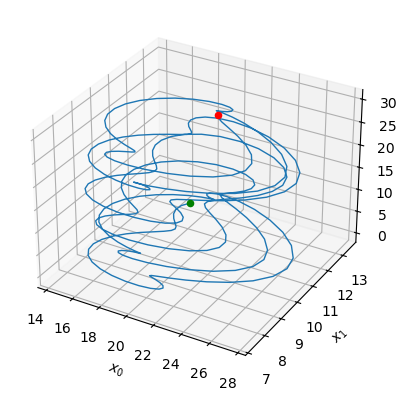

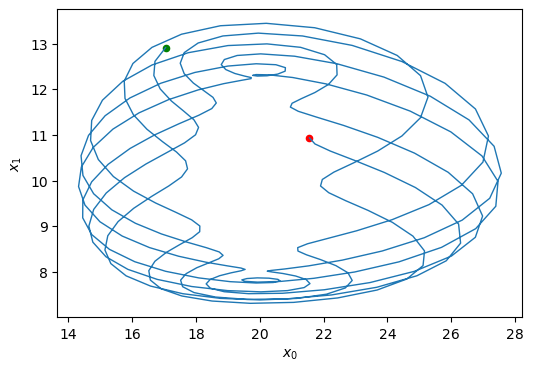

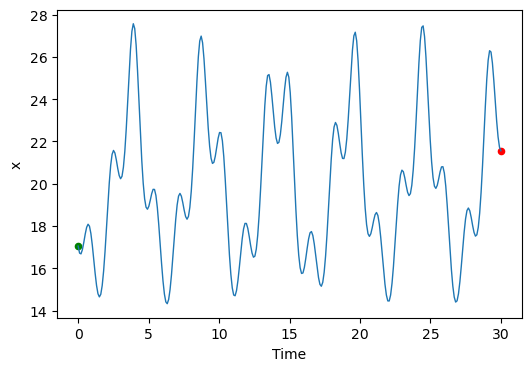

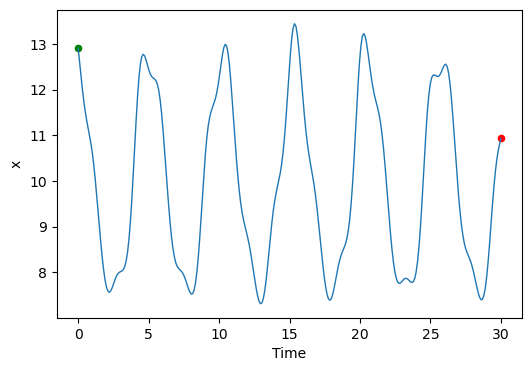

In [4]:
SINDy_data.plot_configuration(X_list)
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:2])
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:1], 30)
SINDy_data.plot_configuration(np.array(X_list)[:,:,1:2], 30)

Running with: ode_name=TVLvODE3, ode_param=1.,-0.1,-1.5,0.075, x_id=0, freq=20, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
 
Simulazione tra:  [ 0 , 30 ]
ODE specified:  TVLvODE3
Data generated
Dataset shape before smoothing:  (201, 50, 3)


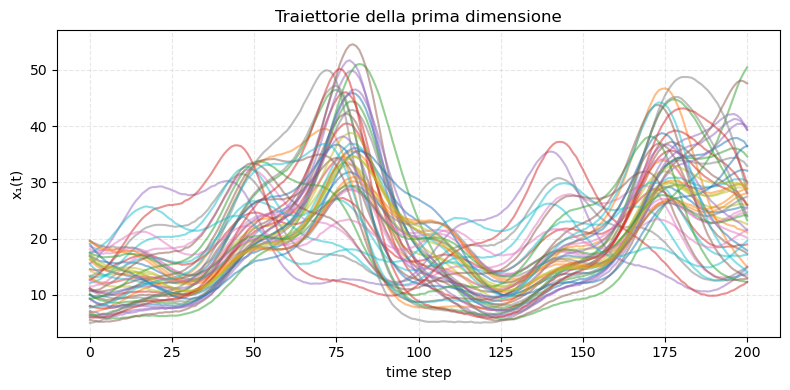

Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      7.96628e+32        6           8435.4          7699.36      2.59m
   1     8.09       5.6755e+10       12          7555.18          6550.52      2.17m
   2     7.70      5.92153e+12        9          7222.79           7343.3      2.07m
 
promising programs:
add(4.109, add(sub(4.154, X1), add(sub(4.822, X1), X2)))
sub(add(sub(0.102, X1), add(3.676, X2)), sub(neg(4.198), sub(4.309, X1)))
neg(sub(neg(2.684), neg(neg(add(add(2.556, sin(X2)), add(4.389, sub(1.190, X1)))))))
add(add(4.109, add(sub(4.154, X1), sin(2.102))), add(sin(sub(X2, neg(X1))), sin(sin(X2))))
add(4.109, add(add(2.556, sin(X2)), add(4.389, sub(1.190, X1))))
neg(neg(

In [3]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq


Start = [0]#, 5, 10, 15, 20]
for T in Start:
    print(' ')
    print('Simulazione tra: ', '[',T, ',',T+30, ']')
    run_DCODE(ode_name, param, 0, freq, n_sample, noise_ratio, seed=100, n_seed=1, T0=T, T=T+10)
    None

In [ ]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq

run_SRT(ode_name, param, 0, freq, n_sample, noise_ratio, 'tv', seed=100, n_seed=1, T0=0, T=20.) # -> 0.0420862788771289*X2 
# run_SRT(ode_name, param, 0, freq, n_sample, noise_ratio, 'tv', seed=100, n_seed=1, T0=0., T=10.)
None